In [1]:
import os
import mokapot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [559]:
path = 'Ex_Auto_DrM3_30umT4_2ngQC_60m_half_PSMsFormattedForPercolator.tab'
df = pd.read_csv(path, sep="\t")
#Dropping this row because it is not a a real row
df = df.iloc[1: :]

In [560]:
df

,SpecId,Label,ScanNr,TotalMatchingFragmentCount,Intensity,PrecursorChargeDiffToMode,DeltaScore,Notch,PsmCount,ModsCount,...,Ambiguity,LongestFragmentIonSeries,ComplementaryIonCount,HydrophobicityZScore,IsVariantPeptide,IsDeadEnd,IsLoop,SpectralAngle,Peptide,Proteins
1,0,1,38422,12,2,-1,9,0,4,1,...,0,8,3,12,0,0,0,0,R.AEGSDVANAVLDGADC[Common Fixed:Carbamidomethy...,P14618
2,1,1,41542,10,2,-1,8,1,5,0,...,0,10,1,7,0,0,0,0,R.SNYLLNTTIAGVEEADVVLLVGTNPR.F,P28331
3,2,1,31383,14,2,0,11,0,6,0,...,5,10,4,4,0,0,0,0,K.TIGGGDDSFNTFFSETGAGK.H,P68363
4,2,1,31383,14,2,0,11,0,6,0,...,5,10,4,4,0,0,0,0,K.TIGGGDDSFNTFFSETGAGK.H,Q9BQE3
5,3,1,30597,10,1,-1,7,0,3,0,...,0,7,2,4,0,0,0,0,R.GGMGSGGLATGIAGGLAGMGGIQNEK.E,P05783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27911,24926,1,18301,4,0,-1,0,0,1,0,...,0,2,0,36,0,0,0,0,R.DILHATFEESLDK.T,Q12789
27912,24927,1,24504,4,0,-1,0,0,1,0,...,0,3,0,6,0,0,0,0,K.DVDGFHVINVGR.M,P13995
27913,24928,-1,41778,2,0,-1,0,1,1,0,...,0,1,0,16,0,0,0,0,R.ANLAEQNVVHLAELEHKTRVVEAEMSDLR.N,DECOY_A5D8V7
27914,24929,1,40038,3,0,0,0,0,1,1,...,0,1,0,33,0,0,0,0,K.EIEDAEKYSFM[Common Variable:Oxidation on M]A...,O43865


In [3]:
psms = mokapot.read_pin(df)
results, models = mokapot.brew(psms)
results.to_txt()

['mokapot.psms.txt', 'mokapot.peptides.txt']

In [4]:
results.psms

,SpecId,Label,ScanNr,Peptide,Proteins,mokapot score,mokapot q-value,mokapot PEP
0,3903,True,15609,K.TAVC[Common Fixed:Carbamidomethyl on C]DIPPR.G,P04350,6.127360,0.000141,1.802468e-12
1,6943,True,15390,K.TAVC[Common Fixed:Carbamidomethyl on C]DIPPR.G,P68371,6.102537,0.000141,1.991560e-12
2,9275,True,16708,K.TAVC[Common Fixed:Carbamidomethyl on C]DIPPR.G,P68371,5.880481,0.000141,4.861465e-12
3,9269,True,16436,K.TAVC[Common Fixed:Carbamidomethyl on C]DIPPR.G,P07437,5.762720,0.000141,7.803779e-12
4,9610,True,17155,K.TAVC[Common Fixed:Carbamidomethyl on C]DIPPR.G,P68371,5.687002,0.000141,1.057941e-11
...,...,...,...,...,...,...,...,...
17358,21832,True,24195,K.KEEKQEAGK.E,Q15651,-3.231233,0.075713,1.000000e+00
17359,24566,True,42882,K.KAM[Common Variable:Oxidation on M]LQEIANQK.G,Q9H0E3,-3.292244,0.075713,1.000000e+00
17360,20146,True,34016,R.SPSVDSARKEPR.W,O00192,-3.307330,0.075713,1.000000e+00
17364,22748,True,39840,K.KEVANTKK.Q,Q96NL6,-3.420488,0.075894,1.000000e+00


In [5]:
below_001df = results.psms[results.psms["mokapot q-value"] <= 0.01]
print("Number of scans at 0.01 or below " + str(len(below_001df)))

Number of scans at 0.01 or below 14611


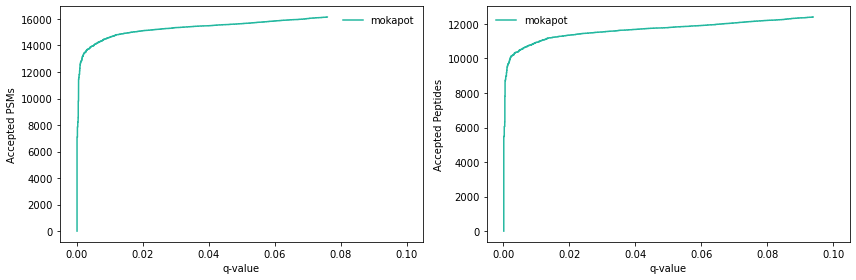

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
colors = ("#343131", "#24B8A0")

# Plot the performance:
for ax, level in zip(axs, results.levels):
    results.plot_qvalues(level=level, c=colors[1], ax=ax,
                           label="mokapot")
    ax.legend(frameon=False)

plt.tight_layout()
plt.show()

In [562]:
path =  "~/Payne_Lab/SingleCellBenchMark/data/MetaMorpheus/Ex_Auto_DrM3_30umT4_2ngQC_60m_half_PSMs.psmtsv.gz"
mm_df =  pd.read_csv(path, sep = "\t")

In [565]:
len(mm_df[mm_df['QValue'] <= 0.01])

15000

In [566]:
mm_df

,File Name,Scan Number,Scan Retention Time,Num Experimental Peaks,Total Ion Current,Precursor Scan Number,Precursor Charge,Precursor MZ,Precursor Mass,Score,...,Localized Scores,Improvement Possible,Cumulative Target,Cumulative Decoy,QValue,Cumulative Target Notch,Cumulative Decoy Notch,QValue Notch,PEP,PEP_QValue
0,Ex_Auto_DrM3_30umT4_2ngQC_60m_half,38422,99.99927,200.0,6.652335e+05,38410,3.0,832.05356,2493.13886,29.422,...,,,1,0.000000,0.000000,1,0.000000,0.000000,2.384186e-07,0.000000
1,Ex_Auto_DrM3_30umT4_2ngQC_60m_half,41542,107.43238,200.0,6.685625e+05,41525,3.0,920.49509,2758.46344,27.441,...,,,2,0.000000,0.000000,1,0.000000,0.000000,4.768372e-07,0.000000
2,Ex_Auto_DrM3_30umT4_2ngQC_60m_half,31383,82.25165,200.0,2.507198e+06,31363,2.0,1004.45233,2006.89010,27.382,...,,,3,0.000000,0.000000,2,0.000000,0.000000,2.503395e-06,0.000001
3,Ex_Auto_DrM3_30umT4_2ngQC_60m_half,30597,80.37420,200.0,8.611592e+05,30582,3.0,754.37530,2260.10407,27.330,...,,,4,0.000000,0.000000,3,0.000000,0.000000,2.920628e-06,0.000001
4,Ex_Auto_DrM3_30umT4_2ngQC_60m_half,31529,82.60131,165.0,5.543239e+05,31517,4.0,753.65065,3010.57350,27.309,...,,,5,0.000000,0.000000,4,0.000000,0.000000,1.192093e-07,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24926,Ex_Auto_DrM3_30umT4_2ngQC_60m_half,18301,51.18092,164.0,6.513905e+05,18281,3.0,506.59662,1516.76804,5.012,...,,,27576,4098.683333,0.148627,25518,2703.016667,0.105918,9.999930e-01,0.249032
24927,Ex_Auto_DrM3_30umT4_2ngQC_60m_half,24504,65.87360,156.0,1.109415e+06,24485,3.0,443.23148,1326.67260,5.011,...,,,27577,4098.683333,0.148627,25519,2703.016667,0.105918,9.982948e-01,0.103523
24928,Ex_Auto_DrM3_30umT4_2ngQC_60m_half,41778,108.00251,200.0,8.064766e+05,41768,3.0,1101.57425,3301.70091,5.011,...,,,27577,4099.683333,0.148652,2056,1389.333333,0.675417,9.999995e-01,0.315856
24929,Ex_Auto_DrM3_30umT4_2ngQC_60m_half,40038,103.85943,153.0,7.784972e+05,40017,2.0,939.43557,1876.85659,5.011,...,,,27578,4099.683333,0.148652,25520,2703.016667,0.105918,9.999992e-01,0.306404


In [552]:
def make_target_col(row):
    if row['Decoy'] == "Y":
        return True
    else:
        return False

In [553]:
def format_oxidation(row, column, to_replace):
    peptide = row[column]
#     print(to_replace)
    replace_with = "+15.995"
    if pd.isna(peptide):
        new_pep = peptide
    else:
        if to_replace in peptide:
            new_pep = peptide.replace(to_replace, replace_with)
        else:
            new_pep = peptide
    return new_pep

In [554]:
mm_df["target_column"] = mm_df.apply(make_target_col, axis = 1)
mm_df['peptide'] = mm_df.apply(lambda row: format_oxidation(row, "Full Sequence", "[Common Variable:Oxidation on M]"), axis=1)

In [555]:
mm_df = mm_df.drop(columns = {'File Name','Notch','Base Sequence', 'Full Sequence', 'Essential Sequence', 
                              'Num Variable Mods','Missed Cleavages', 'Peptide Monoisotopic Mass',
                              'Mass Diff (Da)', 'Mass Diff (ppm)', 'Protein Accession',
                              'Protein Name', 'Gene Name', 'Organism Name', 'Contaminant','Decoy', 
                              'Peptide Description', 'Start and End Residues In Protein',
                              'Previous Amino Acid', 'Next Amino Acid', 'Theoreticals Searched',
                              'Decoy/Contaminant/Target', 'Matched Ion Series','Matched Ion Mass-To-Charge Ratios', 
                              'Matched Ion Mass Diff (Da)','Matched Ion Mass Diff (Ppm)', 
                              'Matched Ion Intensities','Localized Scores','Improvement Possible'})

In [556]:
mm_df.columns

Index(['Scan Number', 'Scan Retention Time', 'Num Experimental Peaks',
       'Total Ion Current', 'Precursor Scan Number', 'Precursor Charge',
       'Precursor MZ', 'Precursor Mass', 'Score', 'Delta Score',
       'PSM Count (unambiguous, <0.01 q-value)', 'Mods',
       'Mods Chemical Formulas', 'Mods Combined Chemical Formula',
       'Identified Sequence Variations', 'Splice Sites', 'Matched Ion Counts',
       'Normalized Spectral Angle', 'Improvement Possible',
       'Cumulative Target', 'Cumulative Decoy', 'QValue',
       'Cumulative Target Notch', 'Cumulative Decoy Notch', 'QValue Notch',
       'PEP', 'PEP_QValue', 'target_column', 'peptide'],
      dtype='object')

In [557]:
mm_for_MP = mokapot.dataset.LinearPsmDataset(mm_df, target_column = "target_column", spectrum_columns = "Scan Number", 
                                             peptide_column = "peptide", protein_column=None, 
                                             group_column=None, feature_columns=None, copy_data=True)

In [558]:
results, models = mokapot.brew(mm_for_MP)
#results.to_txt()

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mnon-precise type array(pyobject, 1d, C)[0m
[0m[1mDuring: typing of argument at /Users/daishavanderwatt/anaconda3/lib/python3.8/site-packages/mokapot/qvalues.py (204)[0m
[1m
File "../../anaconda3/lib/python3.8/site-packages/mokapot/qvalues.py", line 204:[0m
[1mdef _fdr2qvalue(fdr, num_total, met, indices):
    <source elided>
    """
[1m    min_q = 1
[0m    [1m^[0m[0m
